In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import scipy.io as sio
import glob
from toolz.curried import pipe, curry
import CorrMaster as cm
import ase.io as aio
import atomistics as amks
import scipy.ndimage.morphology as morph
import scipy.ndimage.measurements as measure
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA as iPCA

distance_transform = morph.distance_transform_edt

In [84]:
from scipy.spatial import cKDTree

In [4]:
import matplotlib.pyplot as plt

In [49]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12.0, 9.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

def draw(im):
    plt.imshow(im)
    plt.colorbar()
    plt.show()

In [12]:
pld_bulk = pipe("rlxd_bulk_voxels_iza/zz_*ff_pld.npy", 
                lambda x: glob.glob(x), 
                lambda x: sorted(x), 
                lambda x: [np.load(i) for i in x], 
                lambda x: np.asarray(x))

lcd_bulk = pipe("rlxd_bulk_voxels_iza/zz_*ff_lcd.npy", 
                lambda x: glob.glob(x), 
                lambda x: sorted(x), 
                lambda x: [np.load(i) for i in x], 
                lambda x: np.asarray(x))

In [13]:
# pld_slab = pipe("slab_voxels/dgrid/*_pld.npy", 
#                 lambda x: glob.glob(x), 
#                 lambda x: sorted(x), 
#                 lambda x: [np.load(i) for i in x], 
#                 lambda x: np.asarray(x))

# lcd_slab = pipe("slab_voxels/dgrid/*_pld.npy", 
#                 lambda x: glob.glob(x), 
#                 lambda x: sorted(x), 
#                 lambda x: [np.load(i) for i in x], 
#                 lambda x: np.asarray(x))

In [28]:
color = np.zeros((217))
color[:] = 10

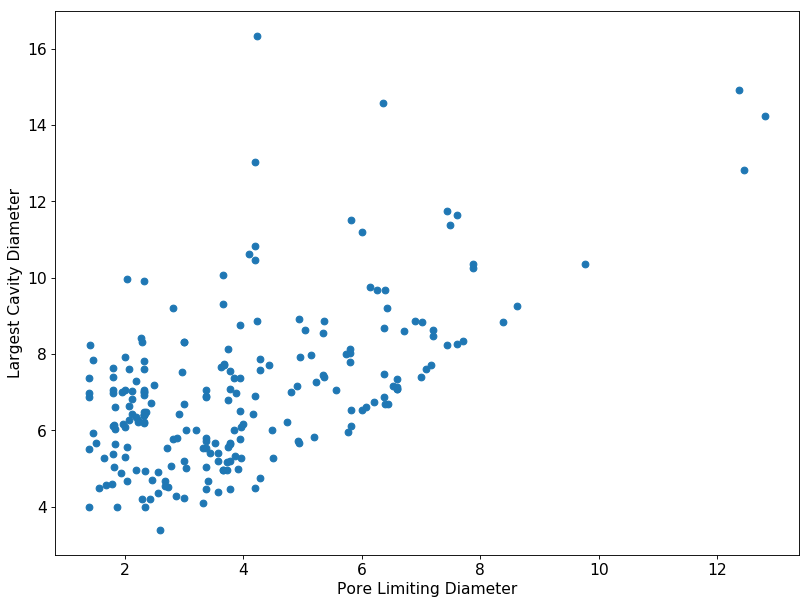

In [103]:
plt.scatter(pld_bulk, lcd_bulk)
plt.xlabel("Pore Limiting Diameter")
plt.ylabel("Largest Cavity Diameter")
plt.show()

In [45]:
cifs = [x.split("/")[-1][3:6] for x in list_po]

In [46]:
cifs.index("MFI")

122

In [36]:
list_po = sorted(glob.glob("stats/zz_*_PO.npy"))
list_pp = sorted(glob.glob("stats/zz_*_PP.npy"))

In [51]:
fname = list_pp[122]
x = np.load(fname)

In [52]:
x.shape

(141, 141, 141)

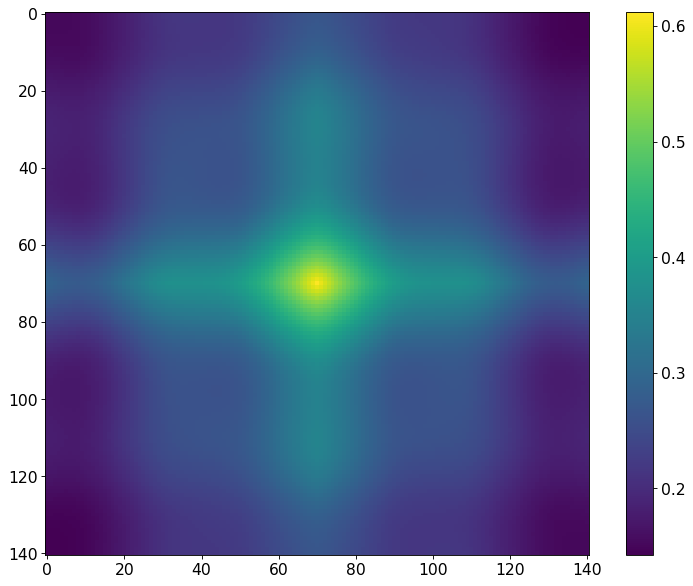

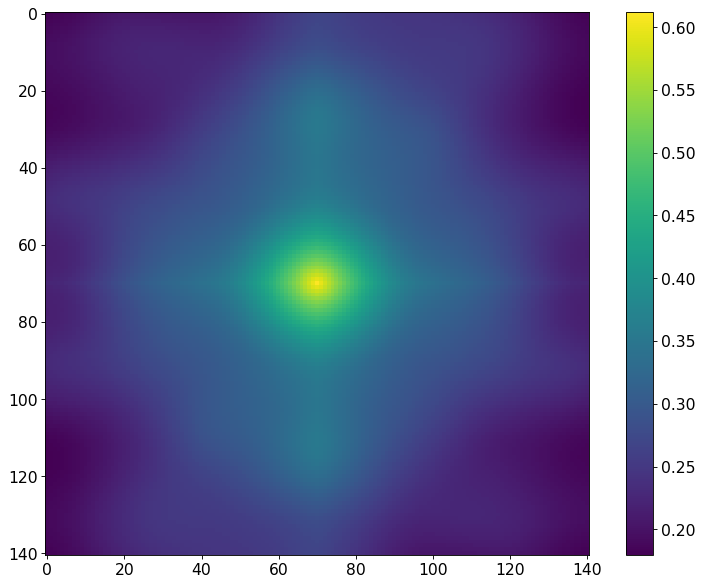

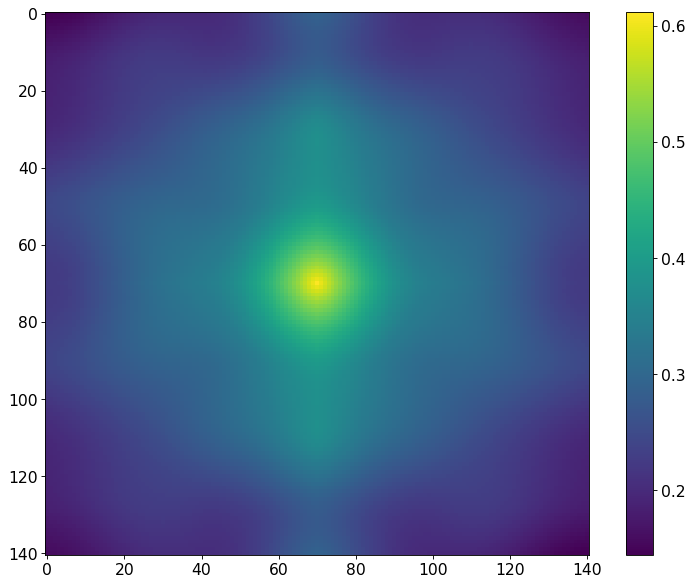

In [53]:
draw(x[:,:,70])
draw(x[:,70,:])
draw(x[70,:,:])

In [56]:
data = np.zeros((217, 141**3))
for i, fname in enumerate(list_pp):
    print(i)
    data[i, :] = np.ravel(np.load(fname))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216


In [70]:
pca = PCA(n_components=50)

In [73]:
new_data = np.concatenate([data[:29,:],data[30:,]])

In [74]:
new_data.shape

(216, 2803221)

In [76]:
%%time
scores1 = pca.fit_transform(new_data)

CPU times: user 3min 27s, sys: 1min 10s, total: 4min 37s
Wall time: 1min 4s


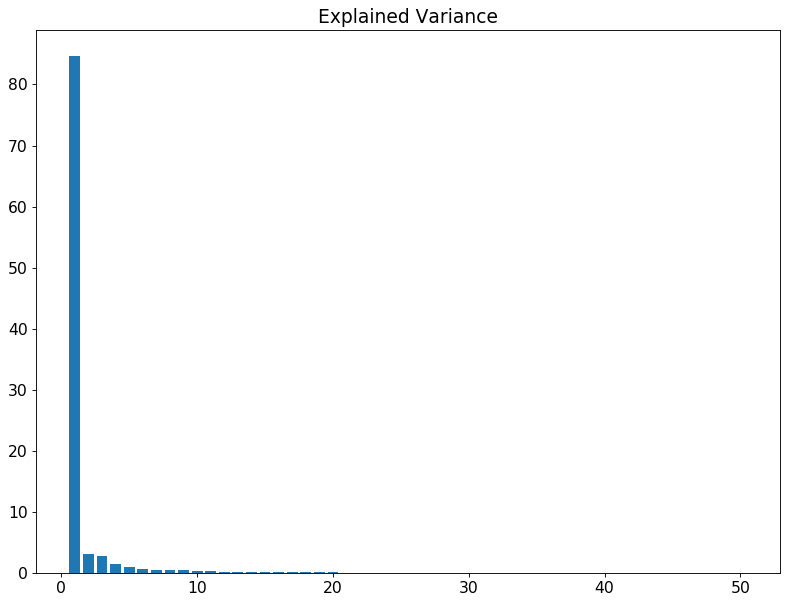

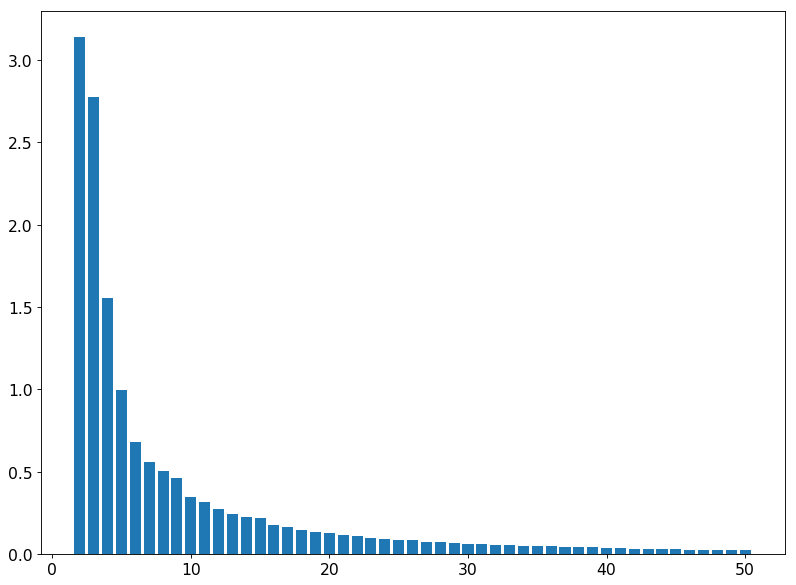

In [77]:
plt.bar(np.arange(1, 51), pca.explained_variance_ratio_ * 100)
plt.title("Explained Variance")
plt.show()
plt.bar(np.arange(2, 51), pca.explained_variance_ratio_[1:] * 100)
plt.show()

In [58]:
%%time
scores = pca.fit_transform(data)

CPU times: user 3min 30s, sys: 1min 18s, total: 4min 49s
Wall time: 1min 8s


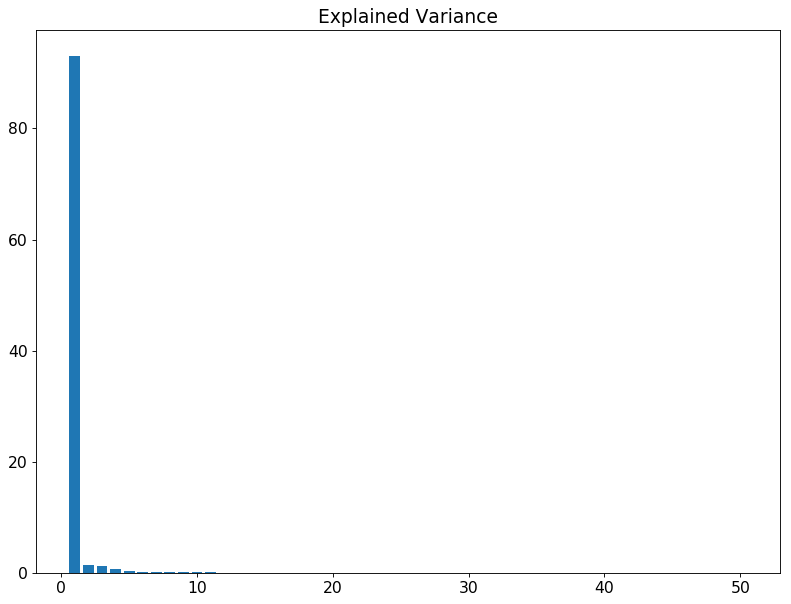

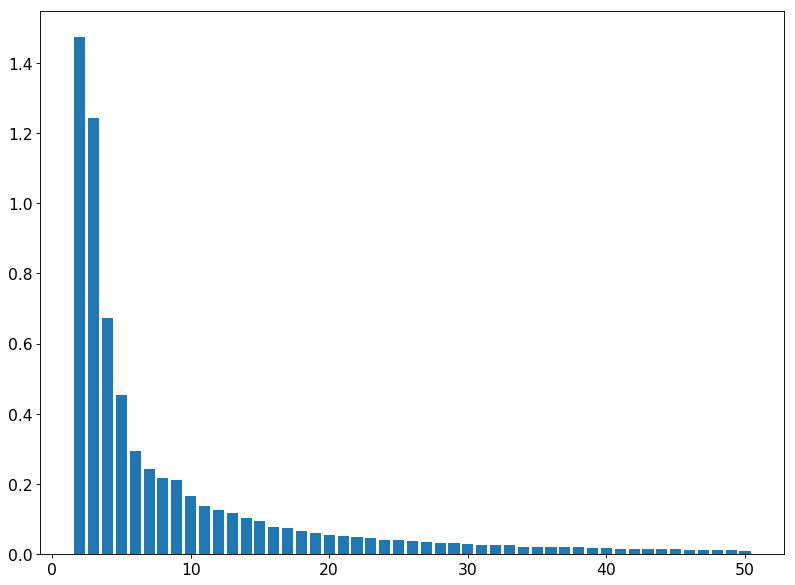

In [64]:
plt.bar(np.arange(1, 51), pca.explained_variance_ratio_ * 100)
plt.title("Explained Variance")
plt.show()
plt.bar(np.arange(2, 51), pca.explained_variance_ratio_[1:] * 100)
plt.show()

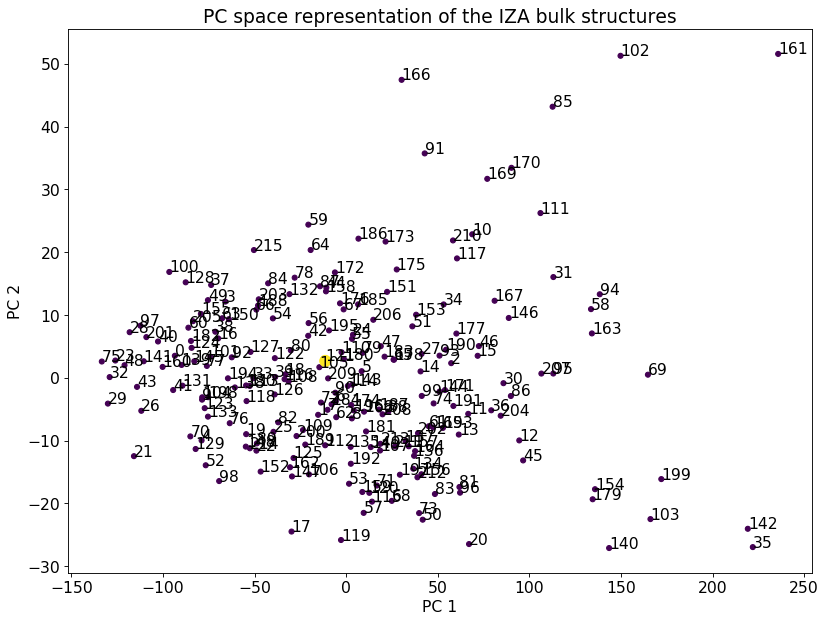

In [82]:
color = np.ones(len(cifs)-1)*20
color[cifs.index("MFI")-1] = 100

plt.scatter(scores1[:,0], scores1[:,1], color, color)
for i in range(scores1.shape[0]):
    plt.text(scores1[i,0], scores1[i,1], str(i))
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PC space representation of the IZA bulk structures")
plt.show()

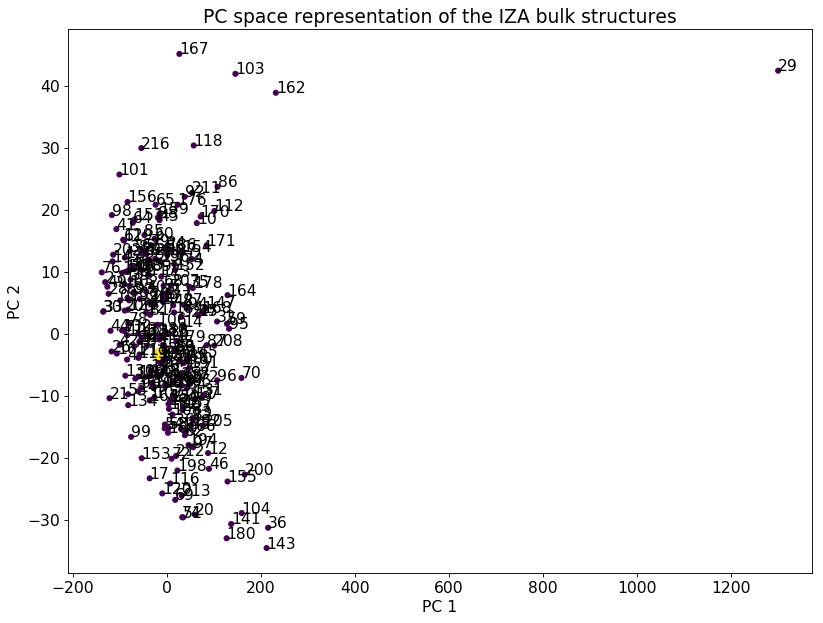

In [68]:
color = np.ones(len(cifs))*20
color[cifs.index("MFI")] = 100

plt.scatter(scores[:,0], scores[:,1], color, color)
for i in range(scores.shape[0]):
    plt.text(scores[i,0], scores[i,1], str(i))
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PC space representation of the IZA bulk structures")
plt.show()

In [98]:
cifs.index("DDR")

51

In [69]:
cifs[29]

'AWW'

In [92]:
tree = cKDTree(scores)
dists, indxs = tree.query(scores[122,...], k=10)
print(np.array(cifs)[indxs][0:])

['MFI' 'SFG' 'KFI' 'ITR' 'SFE' 'SGT' 'CFI' 'EZT' 'OFF' 'TUN']


In [99]:
tree = cKDTree(scores)
dists, indxs = tree.query(scores[51,...], k=10)
print(np.array(cifs)[indxs][0:])

['DDR' 'UFI' 'MWW' 'SAT' 'ERI' 'VNI' 'GIU' 'SWY' 'STW' 'TOL']


In [101]:
coords = np.concatenate([pld_bulk[:,None], lcd_bulk[:,None]], axis=1)

In [102]:
tree = cKDTree(coords)
dists, indxs = tree.query(coords[122,...], k=10)
print(np.array(cifs)[indxs][0:])

['MFI' 'IMF' 'MEL' 'UOV' 'SFG' 'TER' 'JSR' 'ITH' 'SFF' 'STF']
